# Order Test [Work-In-Progress]

- Create & Configure DynapSE1NeuronSynapseJax object
- Test if it's compatible with just-in-time compilation
- Test differentiability

In [1]:
from rockpool import (
    TSEvent,
    TSContinuous,
)

from rockpool.devices.dynapse import (
    DynapSE1NeuronSynapseJax,
    DynapSE1Layout,
    DPIParameters,
    SynapseParameters,
    FeedbackParameters,
    MembraneParameters,
    AHPParameters,
    NMDAParameters,
    AMPAParameters,
    GABAAParameters,
    GABABParameters,
    DynapSE1Parameters,
    random_spike_train,
    step_pwl,
    SYN,
)

import numpy as np
import jax.numpy as jnp

# - Plotting imports and config
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams['figure.dpi'] = 300

In [4]:
# layout?

layout = DynapSE1Layout(
    kappa_n=0.75, 
    kappa_p=0.66, 
    Ut=0.025, 
    Io=5e-13
)

print(layout)

DynapSE1Layout(kappa_n=0.75, kappa_p=0.66, Ut=0.025, Io=5e-13)


In [5]:
# DPIParameters?
# SynapseParameters?
# AHPParameters?

ahp = AHPParameters(
    Itau=5e-11, 
    f_gain=4, 
    C=4e-11, 
    tau=5e-1, # Deduce from Itau & layout 
    layout=layout, 
    Iw=1e-07, 
    Isyn=None, # Set to dark current Io
)

# assert ahp == AHPParameters()

print(ahp)

AHPParameters(Itau=2.8368794326241128e-12, f_gain=4, C=4e-11, tau=0.5, layout=DynapSE1Layout(kappa_n=0.75, kappa_p=0.66, Ut=0.025, Io=5e-13), Iw=1e-07, Isyn=5e-13)


In [6]:
# DPIParameters?
# SynapseParameters?
# NMDAParameters?

nmda = NMDAParameters(
    Itau=4e-11, 
    f_gain=4, 
    C=2.8e-11, 
    tau=4e-1, # Deduce from Itau & layout 
    layout=layout, 
    Iw=1e-07, 
    Isyn=None, # Set to dark current Io
)

# assert nmda == NMDAParameters()

print(nmda)

NMDAParameters(Itau=2.482269503546099e-12, f_gain=4, C=2.8e-11, tau=0.4, layout=DynapSE1Layout(kappa_n=0.75, kappa_p=0.66, Ut=0.025, Io=5e-13), Iw=1e-07, Isyn=5e-13)


In [7]:
ampa = AMPAParameters(
    Itau=3e-11, 
    f_gain=4, 
    C=2.8e-11, 
    tau=3e-1, # Deduce from Itau & layout 
    layout=layout, 
    Iw=1e-07, 
    Isyn=None, # Set to dark current Io
)

# assert ampa == AMPAParameters()

print(ampa)

AMPAParameters(Itau=3.309692671394799e-12, f_gain=4, C=2.8e-11, tau=0.3, layout=DynapSE1Layout(kappa_n=0.75, kappa_p=0.66, Ut=0.025, Io=5e-13), Iw=1e-07, Isyn=5e-13)


In [8]:
gaba_a = GABAAParameters(
    Itau=2e-11, 
    f_gain=2, 
    C=2.7e-11, 
    tau=2e-1, # Deduce from Itau & layout 
    layout=layout, 
    Iw=0, # Deactivate the block 
    Isyn=None, # Set to dark current Io
)

# assert gaba_a == GABAAParameters()

print(gaba_a)

GABAAParameters(Itau=4.787234042553191e-12, f_gain=2, C=2.7e-11, tau=0.2, layout=DynapSE1Layout(kappa_n=0.75, kappa_p=0.66, Ut=0.025, Io=5e-13), Iw=0, Isyn=5e-13)


In [9]:
gaba_b = GABABParameters(
    Itau=1e-11, 
    f_gain=4, 
    C=2.7e-11, 
    tau=1e-1, # Deduce from Itau & layout 
    layout=layout, 
    Iw=0, # Deactivate the block 
    Isyn=None, # Set to dark current Io
)

# assert gaba_b == GABABParameters()

print(gaba_b)

GABABParameters(Itau=9.574468085106382e-12, f_gain=4, C=2.7e-11, tau=0.1, layout=DynapSE1Layout(kappa_n=0.75, kappa_p=0.66, Ut=0.025, Io=5e-13), Iw=0, Isyn=5e-13)


In [11]:
# DynapSE1Parameters?

config = DynapSE1Parameters(
    ahp = ahp,
    nmda = nmda,
    ampa = ampa,
    gaba_a = gaba_a,
    gaba_b = gaba_b,
)

print(config)

DynapSE1Parameters(t_ref=0.015, t_pulse=1e-05, fpulse_ahp=0.1, Ispkthr=1e-09, Ireset=5e-13, Idc=5e-13, If_nmda=5e-13, layout=DynapSE1Layout(kappa_n=0.75, kappa_p=0.66, Ut=0.025, Io=5e-13), mem=MembraneParameters(Itau=1e-11, f_gain=4, C=3.2e-12, tau=0.011347517730496453, layout=DynapSE1Layout(kappa_n=0.75, kappa_p=0.66, Ut=0.025, Io=5e-13), Imem=5e-13, feedback=FeedbackParameters(Igain=5e-11, Ith=5e-10, Inorm=1e-11)), ahp=AHPParameters(Itau=2.8368794326241128e-12, f_gain=4, C=4e-11, tau=0.5, layout=DynapSE1Layout(kappa_n=0.75, kappa_p=0.66, Ut=0.025, Io=5e-13), Iw=1e-07, Isyn=5e-13), nmda=NMDAParameters(Itau=2.482269503546099e-12, f_gain=4, C=2.8e-11, tau=0.4, layout=DynapSE1Layout(kappa_n=0.75, kappa_p=0.66, Ut=0.025, Io=5e-13), Iw=1e-07, Isyn=5e-13), ampa=AMPAParameters(Itau=3.309692671394799e-12, f_gain=4, C=2.8e-11, tau=0.3, layout=DynapSE1Layout(kappa_n=0.75, kappa_p=0.66, Ut=0.025, Io=5e-13), Iw=1e-07, Isyn=5e-13), gaba_a=GABAAParameters(Itau=4.787234042553191e-12, f_gain=2, C=2.7

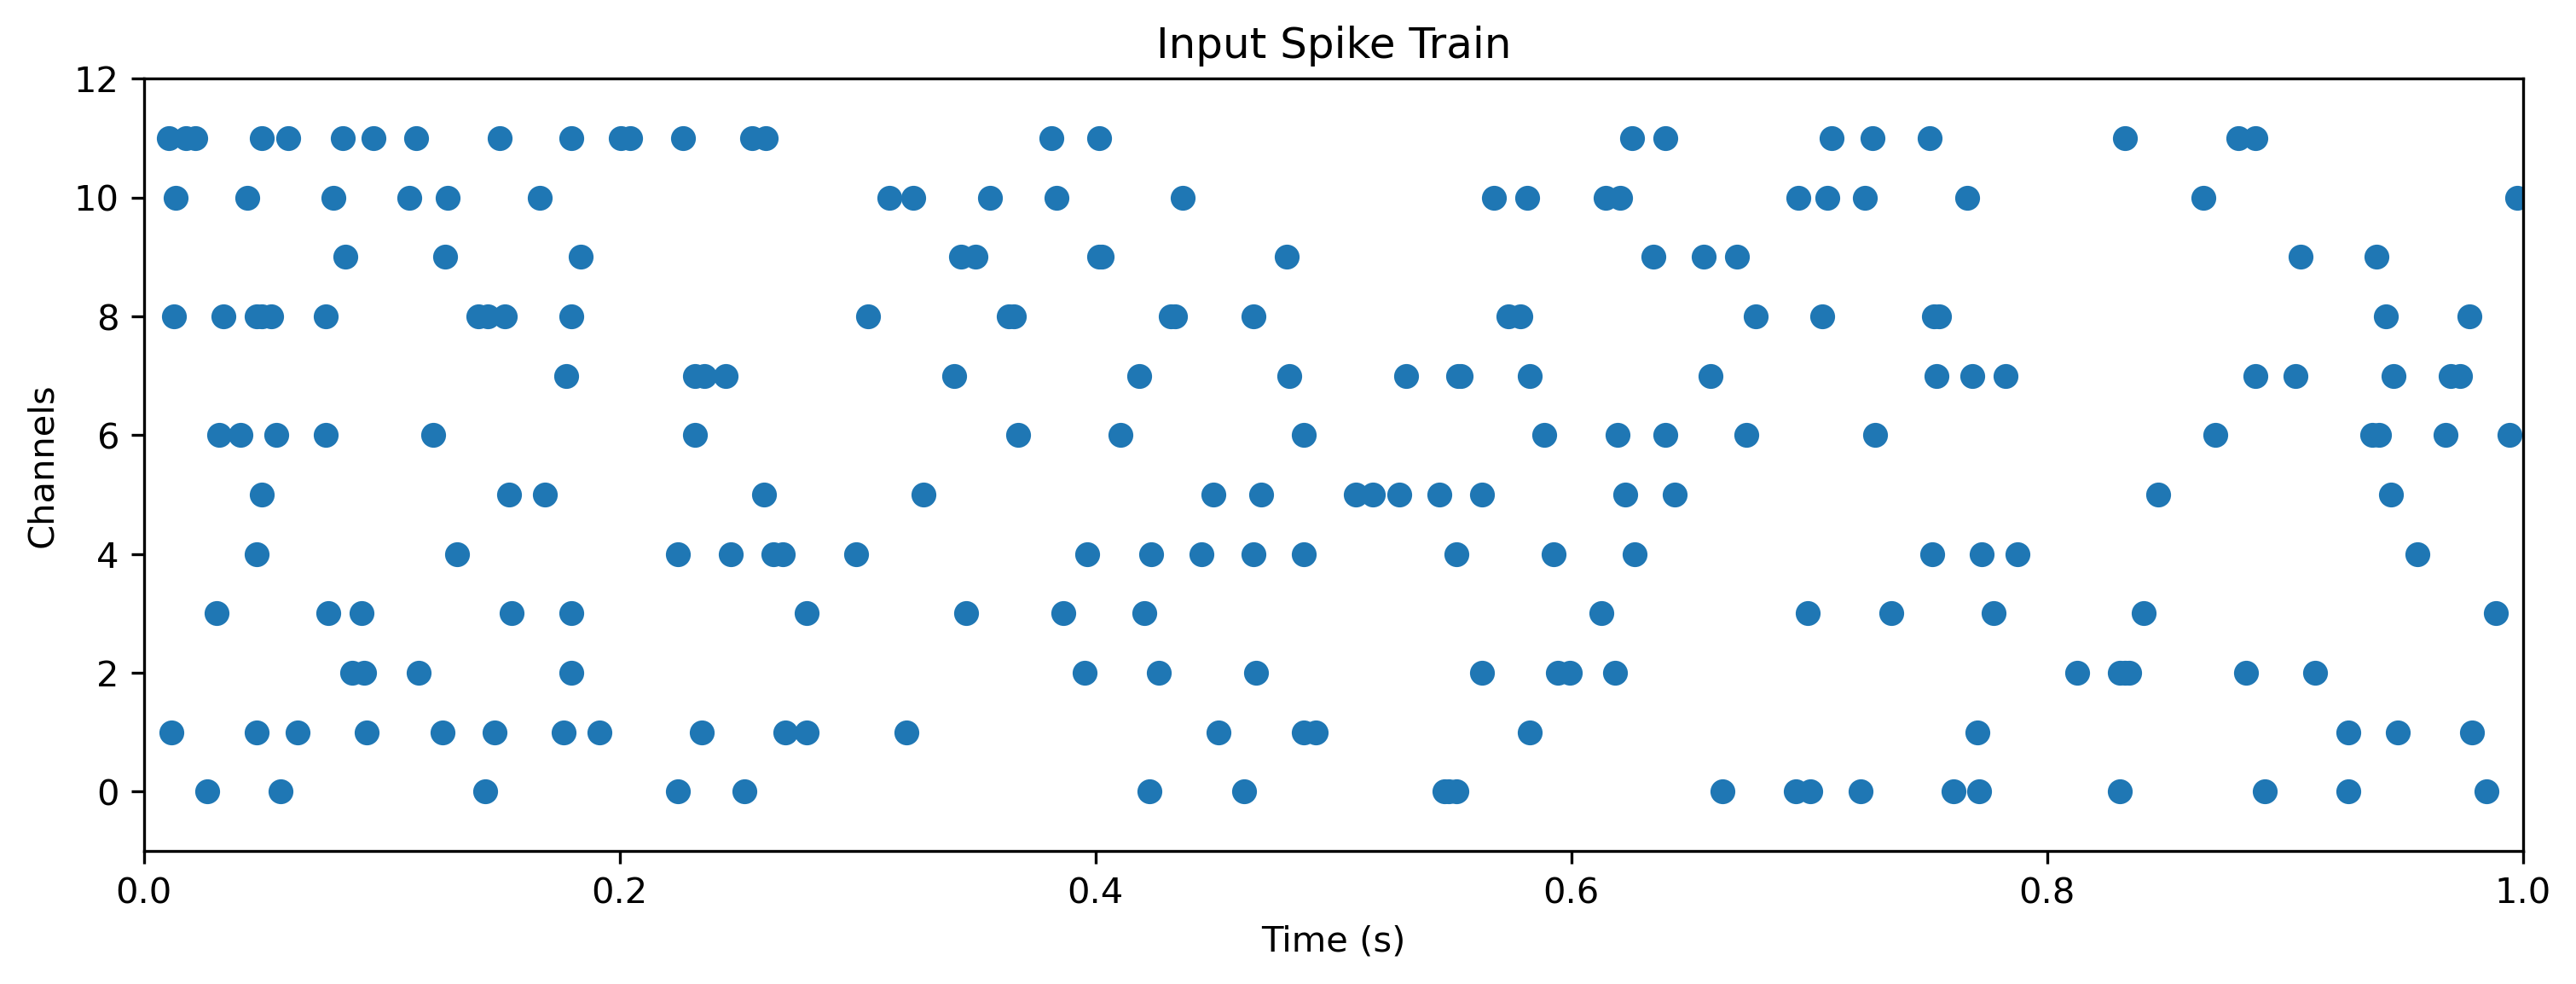

In [16]:
T = 1 # duration in seconds
rate = 20 # firing rate in Hertz

input_ts = random_spike_train(
    duration=T,
    n_channels=N,
    rate=rate,
    dt=dt,
    name='Input Spike Train',
)

input_ts.plot();

In [25]:
import itertools
test_list = list(itertools.permutations([0,1,2,3,4]))
len(test_list)

120

In [ ]:
# VERY LONG TEST
N = 12 # number of neurons
dt = 1e-3 # simulation time resolution

for i in range(len(test_list)):
    for j in range(i,len(test_list)):
        print(i,j)
        modSE = DynapSE1NeuronSynapseJax(
            shape=(N,),
            config=config,
            dt=dt,
            syn_order = SYN(*test_list[i]),
        )

        out_spikes, new_state, record_dict = modSE(input_ts.raster(dt = dt))

        modSE2 = DynapSE1NeuronSynapseJax(
            shape=(N,),
            config=config,
            dt=dt,
            syn_order = SYN(*test_list[j]),
        )

        out_spikes2, new_state2, record_dict2 = modSE2(input_ts.raster(dt = dt))

        np.testing.assert_array_equal(out_spikes, out_spikes2)
        np.testing.assert_array_equal(record_dict["Imem"], record_dict2["Imem"])

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
1 50
1 51
1 52
1 53
1 54
1 55
1 56
1 57
1 58
1 59
1 60
1 61
1 62
1 63
1 64
1 65
1 66
1 67
1 68
1 69
1 70
1 71
1 72
1 73
1 74
1 75
1 76
1 77
1 78
1 79
1 80

13 55
13 56
13 57
13 58
13 59
13 60
13 61
13 62
